In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

from ImportantFunctions import find_csv_filenames
from ImportantFunctions import read_csv_polarization_dependence
from ImportantFunctions import convert_elapsed_time_to_seconds
from ImportantFunctions import psi_vector
from ImportantFunctions import fidelity_with_error
from ImportantFunctions import extract_numbers
from ImportantFunctions import fill_lists

In [5]:
# Fill an array with the names of all the .csv documents located in the path 'file_path'.
file_path = r"C:\Users\HP\Desktop\QKD_Perovskites\EOM_Test\\"
names_files = find_csv_filenames(file_path, suffix="csv")

print("All the files in the directory: \n")

for i, name in enumerate(names_files):
    print("File ",i ,": ", name)

All the files in the directory: 

File  0 :  PolarizationLightAfterEOM_StateV_-100V.csv
File  1 :  PolarizationLightAfterEOM_StateV_-105V.csv
File  2 :  PolarizationLightAfterEOM_StateV_-10V.csv
File  3 :  PolarizationLightAfterEOM_StateV_-110V.csv
File  4 :  PolarizationLightAfterEOM_StateV_-115V.csv
File  5 :  PolarizationLightAfterEOM_StateV_-120V.csv
File  6 :  PolarizationLightAfterEOM_StateV_-125V.csv
File  7 :  PolarizationLightAfterEOM_StateV_-130V.csv
File  8 :  PolarizationLightAfterEOM_StateV_-135V.csv
File  9 :  PolarizationLightAfterEOM_StateV_-140V.csv
File  10 :  PolarizationLightAfterEOM_StateV_-145V.csv
File  11 :  PolarizationLightAfterEOM_StateV_-150V.csv
File  12 :  PolarizationLightAfterEOM_StateV_-155V.csv
File  13 :  PolarizationLightAfterEOM_StateV_-15V.csv
File  14 :  PolarizationLightAfterEOM_StateV_-160V.csv
File  15 :  PolarizationLightAfterEOM_StateV_-165V.csv
File  16 :  PolarizationLightAfterEOM_StateV_-170V.csv
File  17 :  PolarizationLightAfterEOM_State

In [ ]:
file_name = names_files[13]
print("Reading the file ", file_name)

data = read_csv_polarization_dependence(file_path, file_name)

Reading the file  PolarizationLightAfterEOM_StateV_40V.csv


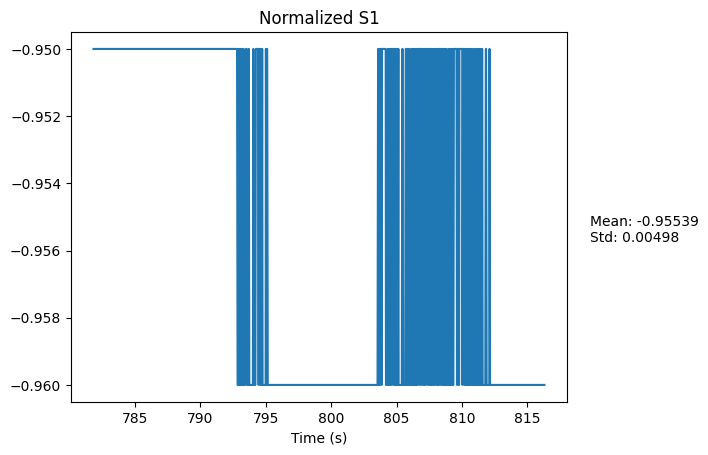

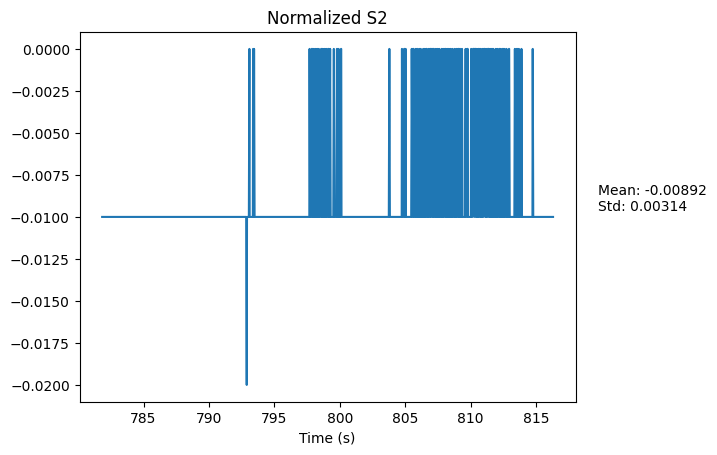

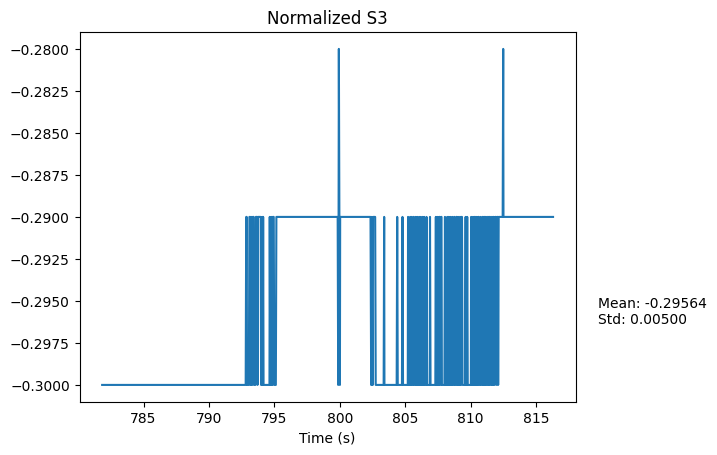

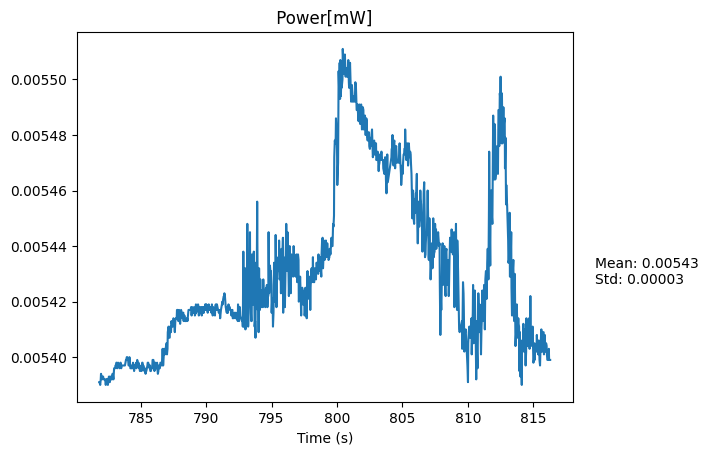

S₁ : -0.9553900000000001 ± 0.004984766794946383
S₂ : -0.008919999999999997 ± 0.0031358571396031426
S₃ : -0.29564 ± 0.004999039907822305
DOP: : 1.000126306073388
DOLP: : 0.9554316398884852
DOCP: : 0.08740300960000001


In [68]:
time = [convert_elapsed_time_to_seconds(elapsed_time) for elapsed_time in data[' Elapsed Time [hh:mm:ss:ms]']]


# Plot Normalized s 1
plt.plot(time, data[' Normalized s 1 '])
plt.title("Normalized S1")
plt.xlabel("Time (s)")

# Calculate mean and standard deviation of Normalized s 1
mean_s1 = np.mean(data[' Normalized s 1 '])
std_s1 = np.std(data[' Normalized s 1 '])
# Annotate with mean and standard deviation
plt.text(max(time) + 0.1 * (max(time) - min(time)), mean_s1, f'Mean: {mean_s1:.5f}\nStd: {std_s1:.5f}', ha='left', va='center')
plt.show()

# Plot Normalized s 2
plt.plot(time, data[' Normalized s 2 '])
plt.title("Normalized S2")
plt.xlabel("Time (s)")

# Calculate mean and standard deviation of Normalized s 2
mean_s2 = np.mean(data[' Normalized s 2 '])
std_s2 = np.std(data[' Normalized s 2 '])
# Annotate with mean and standard deviation
plt.text(max(time) + 0.1 * (max(time) - min(time)), mean_s2, f'Mean: {mean_s2:.5f}\nStd: {std_s2:.5f}', ha='left', va='center')
plt.show()

# Plot Normalized s 3
plt.plot(time, data[' Normalized s 3 '])
plt.title("Normalized S3")
plt.xlabel("Time (s)")

# Calculate mean and standard deviation of Normalized s 3
mean_s3 = np.mean(data[' Normalized s 3 '])
std_s3 = np.std(data[' Normalized s 3 '])
# Annotate with mean and standard deviation
plt.text(max(time) + 0.1 * (max(time) - min(time)), mean_s3, f'Mean: {mean_s3:.5f}\nStd: {std_s3:.5f}', ha='left', va='center')
plt.show()

# Plot Power
plt.plot(time, data[' Power[mW] '])
plt.title(" Power[mW] ")
plt.xlabel("Time (s)")

# Calculate mean and standard deviation of Normalized s 3
mean_power = np.mean(data[' Power[mW] '])
std_power = np.std(data[' Power[mW] '])
# Annotate with mean and standard deviation
plt.text(max(time) + 0.1 * (max(time) - min(time)), mean_power, f'Mean: {mean_power:.5f}\nStd: {std_power:.5f}', ha='left', va='center')
plt.show()

print(f"S\u2081 : {mean_s1} ± {std_s1}")
print(f"S\u2082 : {mean_s2} ± {std_s2}")
print(f"S\u2083 : {mean_s3} ± {std_s3}")
print(f"DOP: : {np.sqrt(mean_s1**2 + mean_s2**2 + mean_s3**2)}")
print(f"DOLP: : {np.sqrt(mean_s1**2 + mean_s2**2)}")
print(f"DOCP: : {np.abs(mean_s3**2)}")

In [69]:
rho = np.zeros((2, 2), dtype=complex)
err_rho = np.zeros((2, 2), dtype=complex)

rho[0,0] = 0.5 * (1 + mean_s1)
rho[0,1] = 0.5 * (mean_s2 - 1j * mean_s3)
rho[1,0] = rho[0,1].conjugate()
rho[1,1] = 0.5 * (1 - mean_s1)

err_rho[0,0] = 0.5 * std_s1
err_rho[1,1] = 0.5 * std_s1
err_rho[0,1] = 0.5 * (std_s2 - 1j * std_s3)
err_rho[1,0] = err_rho[0,1].conjugate()

rho = 0.5*(rho + rho.conj().T)
err_rho = 0.5*(err_rho + err_rho.conj().T)

From the source's POV, we see the light moving away. From the detector's POV, we see the light approaching.


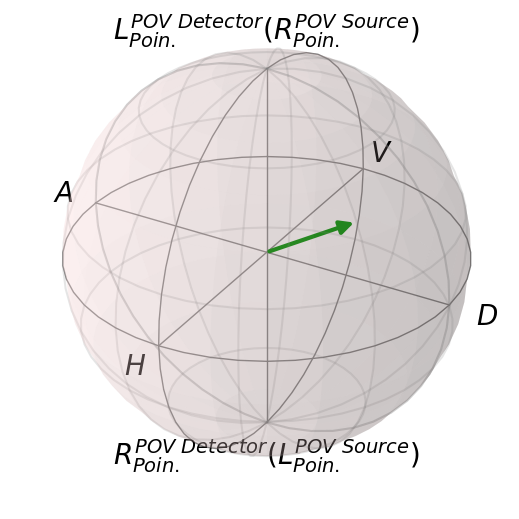

: 

In [ ]:
b = Bloch()
b.xlabel = ['$H$', '$V$']
b.ylabel = ['$D$', '$A$']
b.zlabel = ['$L_{Poin.}^{POV~Detector} (R_{Poin.}^{POV~Source})$', '$R_{Poin.}^{POV~Detector} (L_{Poin.}^{POV~Source})$']

b.add_vectors([mean_s1, mean_s2, mean_s3])
# b.add_vectors([1, 0, 0])    # H
# b.add_vectors([-1, 0, 0])   # V
# b.add_vectors([0, 1, 0])    # D
# b.add_vectors([0, -1, 0])   # A
# b.add_vectors([0, 0, -1])   # R (POV source)
# b.add_vectors([0, 0, 1])    # L (POV source)

b.show()

print("From the source's POV, we see the light moving away. From the detector's POV, we see the light approaching.")

Give  me the parametrers $\phi$ and $\theta$ of the desired state of the form:


\begin{align*}
\ket{\Psi(\theta,\phi)} = e^{- i \phi} \cos\left( \frac{\theta}{2} \right) \ket{H} + \sin\left( \frac{\theta}{2} \right) \ket{V}
\end{align*}


In [146]:
theta_deg = 90  # Example value for theta (in degrees)
phi_deg = 0    # Example value for phi (in degrees)

psi = psi_vector(theta_deg, phi_deg)

print(psi)

[[0.70710678+0.j]
 [0.70710678+0.j]]


In [147]:
fid, err_fid = fidelity_with_error(psi, rho, err_rho)

print("Fidelity: ", fid, "/", err_fid)

Fidelity:  0.0 / 0.0062808737449498225


## Performance EOM

In [ ]:
import numpy as np
import re

# Arrays donde iremos guardando resultados
means_s1, stds_s1 = [], []
means_s2, stds_s2 = [], []
means_s3, stds_s3 = [], []
voltages = []

for file_name in names_files:
    print("Reading the file:", file_name)
    data = read_csv_polarization_dependence(file_path, file_name)

    # Calcular medias y desviaciones
    mean_s1 = np.mean(data[' Normalized s 1 '])
    std_s1  = np.std(data[' Normalized s 1 '])
    mean_s2 = np.mean(data[' Normalized s 2 '])
    std_s2  = np.std(data[' Normalized s 2 '])
    mean_s3 = np.mean(data[' Normalized s 3 '])
    std_s3  = np.std(data[' Normalized s 3 '])

    means_s1.append(mean_s1); stds_s1.append(std_s1)
    means_s2.append(mean_s2); stds_s2.append(std_s2)
    means_s3.append(mean_s3); stds_s3.append(std_s3)

    # Extraer voltaje del nombre (ej: "PolarizationLightAfterEOM_StateV_-155V.csv")
    match = re.search(r'V_(-?\d+)V', file_name)
    if match:
        volt = int(match.group(1))
    else:
        volt = None  # o np.nan si prefieres
    voltages.append(volt)

# Convertir a arrays de numpy si quieres
means_s1 = np.array(means_s1)
stds_s1  = np.array(stds_s1)
means_s2 = np.array(means_s2)
stds_s2  = np.array(stds_s2)
means_s3 = np.array(means_s3)
stds_s3  = np.array(stds_s3)
voltages = np.array(voltages)

print("Voltages:", voltages)


Leyendo el archivo: PolarizationLightAfterEOM_StateV_-100V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-105V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-10V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-110V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-115V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-120V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-125V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-130V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-135V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-140V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-145V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-150V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-155V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-15V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-160V.csv
Leyendo el archivo: PolarizationLightAfterEOM_StateV_-165

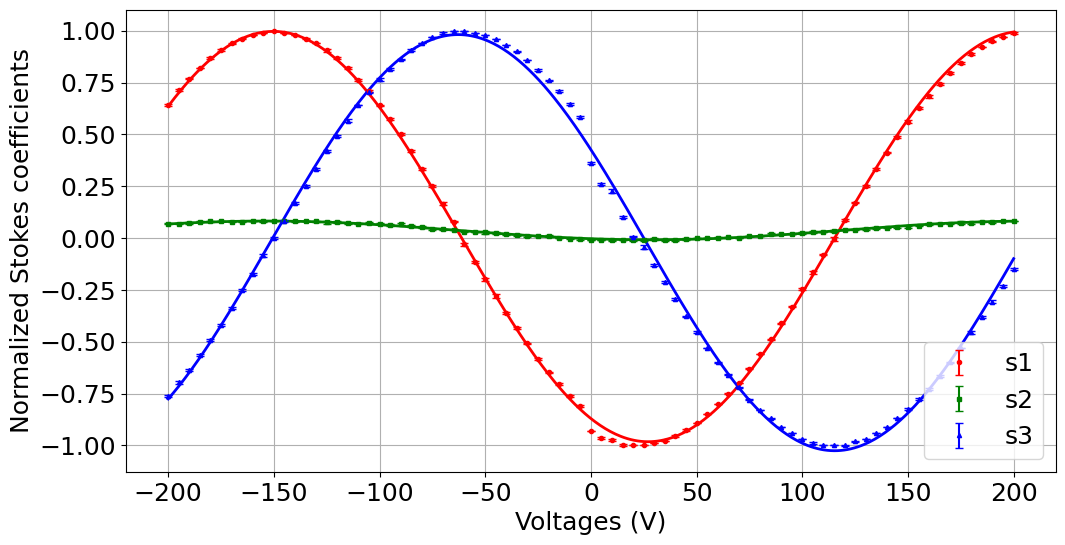

In [85]:
from scipy.optimize import curve_fit

# Define the sine function for fitting
def sine_func(x, A, B, C, D):
    return A + B * np.sin(x / C + D)

# Variables for plotting
marker_size = 3
font_size = 18  # This will control labels, legend, and tick numbers

plt.figure(figsize=(12,6))

# Colors and markers for the three datasets
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
means = [means_s1, means_s2, means_s3]
stds = [stds_s1, stds_s2, stds_s3]
labels = ['s1', 's2', 's3']

# Fit and plot each dataset
x_fit = np.linspace(min(voltages), max(voltages), 500)  # Smooth x for plotting fit

for i in range(3):
    # Fit the sine function
    popt, _ = curve_fit(sine_func, voltages, means[i],
                        p0=[np.mean(means[i]), (max(means[i])-min(means[i]))/2, 100, 0])
    
    # Plot data with error bars
    plt.errorbar(voltages, means[i], yerr=stds[i], fmt=markers[i], markersize=marker_size,
                 capsize=3, label=labels[i], color=colors[i])
    
    # Plot the fitted curve with same color
    plt.plot(x_fit, sine_func(x_fit, *popt), color=colors[i], linestyle='-', linewidth=2)

# Labels, title, legend, grid
plt.xlabel('Voltages (V)', fontsize=font_size)
plt.ylabel('Normalized Stokes coefficients', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.grid(True)

# Change the tick label size using font_size
plt.tick_params(axis='both', which='major', labelsize=font_size)

plt.show()


## Finding the Mueller matrix

See the procedure that we have used in https://math.stackexchange.com/questions/3272567/find-a-transformation-3-times-3-matrix-given-a-set-of-input-and-output-3-ti

#### Create two dictionaries, S ans S' for store the different "Input vectors" and "Output vectors" respectively

In [9]:
indexes_5mirrors_600s = [26,27,29,30,31,32]
indexes_2mirrors_600s = [20,21,22,23,24,25]
indexes_0mirrors_600s = [14,15,16,17,18,19]

#### Fill the dictionary S with the different "input vectors"

In [19]:
S_dict = {}
indexes = indexes_0mirrors_600s

for i in indexes:


    data = read_csv_polarization_dependence(file_path, names_files[i])
    print('File name: ', names_files[i])

    mean_s1 = np.mean(data[' Normalized s 1 '])
    mean_s2 = np.mean(data[' Normalized s 2 '])
    mean_s3 = np.mean(data[' Normalized s 3 '])

    # Extract three numbers after "POL" and "QWP" from the string
    numbers = extract_numbers(names_files[i])

    if numbers:

        # Construct the dictionary key
        key = "POL{}QWP{}".format(numbers[0], numbers[1])
        print('Reading data', key, '\n')
        # Add the new key-value pair to the dictionary
        S_dict[key] = np.array([mean_s1, mean_s2, mean_s3])

    else:
        print("Error: Could not extract the required numbers from the string.")

# Verify the dictionary
print(S_dict)

File name:  20240326T0900_91uW_-0.99_0.09_0.12_POL033deg_QWP049deg_600s.csv
Reading data POL33QWP49 

File name:  20240326T0915_100uW_0.98_0.03_-0.19_POL080deg_QWP051deg_600s.csv
Reading data POL80QWP51 

File name:  20240326T0929_100uW_0.09_0.98_0.17_POL016deg_QWP008deg_600s.csv
Reading data POL16QWP8 

File name:  20240326T0942_100uW_0.03_-0.99_-0.13_POL058deg_QWP004deg_600s.csv
Reading data POL58QWP4 

File name:  20240326T1010_100uW_0.15_0.04_0.99_POL052deg_QWP042deg_600s.csv
Reading data POL52QWP42 

File name:  20240326T1022_100uW_-0.15_0.08_-0.99_POL008deg_QWP044deg_600s.csv
Reading data POL8QWP44 

{'POL33QWP49': array([-0.98168258,  0.08408755,  0.16649793]), 'POL80QWP51': array([ 0.98324451,  0.03134318, -0.1735848 ]), 'POL16QWP8': array([0.07237504, 0.98840525, 0.14631787]), 'POL58QWP4': array([ 0.02665219, -0.99808722, -0.05770539]), 'POL52QWP42': array([0.10047036, 0.03767165, 0.99447108]), 'POL8QWP44': array([-0.11316433,  0.05695793, -0.99168105])}


#### Fill the dictionary S' with the different "output vectors"

In [20]:
S_dict_prime = {}
indexes = indexes_5mirrors_600s

for i in indexes:

    data = read_csv_polarization_dependence(file_path, names_files[i])
    print('File name: ', names_files[i])

    mean_s1 = np.mean(data[' Normalized s 1 '])
    mean_s2 = np.mean(data[' Normalized s 2 '])
    mean_s3 = np.mean(data[' Normalized s 3 '])
    # Extract three numbers after "POL" and "QWP" from the string
    numbers = extract_numbers(names_files[i])

    if numbers:

        # Construct the dictionary key
        key = "POL{}QWP{}".format(numbers[0], numbers[1])
        print('Reading data', key, '\n')
        # Add the new key-value pair to the dictionary
        S_dict_prime[key] = np.array([mean_s1, mean_s2, mean_s3])

    else:
        print("Error: Could not extract the required numbers from the string.")

# Verify the dictionary
print(S_dict_prime)

File name:  20240326T1706_150uW_POL033deg_QWP049deg_600s_after-5mirrors.csv
Reading data POL33QWP49 

File name:  20240326T1718_150uW_POL080deg_QWP051deg_600s_after-5mirrors.csv
Reading data POL80QWP51 

File name:  20240326T1757_150uW_POL058deg_QWP004deg_600s_after-5mirrors.csv
Reading data POL58QWP4 

File name:  20240326T1814_150uW_POL052deg_QWP042deg_600s_after-5mirrors.csv
Reading data POL52QWP42 

File name:  20240326T1829_150uW_POL008deg_QWP044deg_600s_after-5mirrors.csv
Reading data POL8QWP44 

File name:  20240326T1847_150uW_POL016deg_QWP008deg_600s_after-5mirrors.csv
Reading data POL16QWP8 

{'POL33QWP49': array([ 0.41201693,  0.40810373, -0.81370971]), 'POL80QWP51': array([-0.48948649, -0.46403423,  0.73769009]), 'POL58QWP4': array([-0.06276017,  0.85947065,  0.51095607]), 'POL52QWP42': array([ 0.93398523, -0.20844228,  0.28856654]), 'POL8QWP44': array([-0.90856398,  0.18965852, -0.37229331]), 'POL16QWP8': array([ 0.06684845, -0.87182325, -0.48426746])}


#### Fin the Mueller matrix that fulfills S'=MS

In [21]:
# Create the matrices S_matrix and S_prime_matrix
S_list, S_prime_list = fill_lists(S_dict, S_dict_prime)

print(S_list)
print(S_prime_list)

# Create the matrices S_matrix and S_prime_matrix
S_matrix = np.column_stack(S_list)
S_prime_matrix = np.column_stack(S_prime_list)

# Calculate the product between S_prime_matrix and the transpose of S_matrix (S_prime_matrix * S_matrix.T)
result_UVt = np.dot(S_prime_matrix, S_matrix.T)
# Calculate the product between S_matrix and the transpose of S_matrix (S_matrix * S_matrix.T)
result_VVt = np.dot(S_matrix, S_matrix.T)
inverse_result_VVt = np.linalg.inv(result_VVt)

M = np.dot(result_UVt, inverse_result_VVt)

# Print the Mueller matrix
print('\nMueller matrix:')
print(M)

print('\nChecking:')
# Checking
for i in range(len(S_list)):
    print('S\':', S_prime_list[i],'\tM*S:', np.dot(M, S_list[i]))

[array([-0.98168258,  0.08408755,  0.16649793]), array([ 0.98324451,  0.03134318, -0.1735848 ]), array([0.07237504, 0.98840525, 0.14631787]), array([ 0.02665219, -0.99808722, -0.05770539]), array([0.10047036, 0.03767165, 0.99447108]), array([-0.11316433,  0.05695793, -0.99168105])]
[array([ 0.41201693,  0.40810373, -0.81370971]), array([-0.48948649, -0.46403423,  0.73769009]), array([ 0.06684845, -0.87182325, -0.48426746]), array([-0.06276017,  0.85947065,  0.51095607]), array([ 0.93398523, -0.20844228,  0.28856654]), array([-0.90856398,  0.18965852, -0.37229331])]

Mueller matrix:
[[-0.29499981 -0.02772102  0.95805388]
 [-0.49248325 -0.84185143 -0.1548525 ]
 [ 0.81433063 -0.54494517  0.23783747]]

Checking:
S': [ 0.41201693  0.40810373 -0.81370971] 	M*S: [ 0.44677917  0.38689038 -0.80563785]
S': [-0.48948649 -0.46403423  0.73769009] 	M*S: [-0.45722941 -0.48373771  0.74232084]
S': [ 0.06684845 -0.87182325 -0.48426746] 	M*S: [ 0.09143017 -0.89039156 -0.44488957]
S': [-0.06276017  0.8594

In [32]:
print('Mueller matrix 0mirrors -> 5mirrors:')
print(M)

M_inv = np.linalg.inv(M)
M_mirror = np.array([[1, 0, 0],
                     [0, -1, 0],
                     [0, 0, -1]])


det = np.linalg.det(np.dot(M_mirror, M_inv))
DLP_final = 0.566762342954987

print('\n')
print('Final DOP: ', DLP_final)
print('Initial DOP: ', DLP_final/det)

Mueller matrix 0mirrors -> 5mirrors:
[[-0.29499981 -0.02772102  0.95805388]
 [-0.49248325 -0.84185143 -0.1548525 ]
 [ 0.81433063 -0.54494517  0.23783747]]


Final DOP:  0.566762342954987
Initial DOP:  0.5656951254363979


## Some test for prove that the code works as expected:

In [13]:
# Generate 10 lists of 4 numbers and store them in the list S
S = [np.random.rand(3) for _ in range(4)]

# Define a random 4x4 matrix M
M_random = np.random.rand(3, 3)

# Generate the lists v = M*u for each list u in S
S_prime = []
for s in S:
    # We slightly vary the M matrix in each iteration
    M_new = M_random + 0.001 * np.random.rand(3, 3)
    S_prime.append(np.dot(M_new, s))
    
print(S)
print(S_prime)

print('\n')

# Create the matrices S_matrix and S_prime_matrix
S_matrix = np.column_stack(S)
S_prime_matrix = np.column_stack(S_prime)

# Calculate the product between S_prime_matrix and the transpose of S_matrix (S_prime_matrix * S_matrix.T)
result_UVt = np.dot(S_prime_matrix, S_matrix.T)
# Calculate the product between S_matrix and the transpose of S_matrix (S_matrix * S_matrix.T)
result_VVt = np.dot(S_matrix, S_matrix.T)
inverse_result_VVt = np.linalg.inv(result_VVt)

M = np.dot(result_UVt, inverse_result_VVt)

print(M)
print(M_random)
print(M-M_random)

print('\n')

# Initialize an empty matrix
S_prime_expected = np.empty((len(M), len(S)))

# Fill the matrix with columns
for i, s in enumerate(S):
    S_prime_expected[:, i] = np.dot(M, s)

print(S_prime_expected - S_prime_matrix)

[array([0.39077756, 0.19801605, 0.30703816]), array([0.12888685, 0.04108308, 0.09018992]), array([0.33082219, 0.90672297, 0.75884806]), array([0.84240649, 0.13579906, 0.70025956])]
[array([0.53823748, 0.66340097, 0.70203084]), array([0.14775053, 0.19468706, 0.21035892]), array([1.50459131, 1.41096536, 1.37235015]), array([0.95591056, 1.26161563, 1.39931903])]


[[0.26376134 0.81919919 0.88891072]
 [0.80173499 0.67204133 0.70683245]
 [0.89972762 0.49983455 0.8189899 ]]
[[0.26245177 0.81768296 0.88971474]
 [0.80192292 0.67135814 0.70575687]
 [0.89955269 0.49911713 0.81848278]]
[[ 0.00130957  0.00151623 -0.00080402]
 [-0.00018793  0.00068319  0.00107558]
 [ 0.00017493  0.00071742  0.00050711]]


[[-2.13724921e-05  7.08518861e-05  1.69560653e-06 -1.59178539e-06]
 [-1.42740408e-06  4.73198312e-06  1.13244440e-07 -1.06310513e-07]
 [-1.05926968e-06  3.51158176e-06  8.40381293e-08 -7.88925547e-08]]
